In [3]:
%load_ext autoreload
%autoreload 2

import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statistics 
from src.strike_tools import calculate_stable_strike, probability_stable_strike, calculate_turbo_strikes, calculate_cvi_strike, calculate_volatility_strike

warnings.simplefilter(action='ignore', category=FutureWarning)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
#stable_tickers = ["cusd", "dai", "fdusd", "frax", "lusd","mai" ,"pyusd", "steth", "tusd", "usdc", "usdd", "usdt", "wbtc"] 
stable_tickers = [ "usde"]

asset_name_list = []
ideal_strike_list = []
exp_probability_list = []
#current_strike_list = []
#current_probability_list = []
alt_strike_list = []
alt_probability_list = []
week_num = []
#multiplier_list = []

for ticker in stable_tickers:
    print(ticker)
    csv_file_path = f'data/{ticker}/{ticker}_daily.csv'
    price_history = pd.read_csv(csv_file_path)
    ideal_strike,exp_probability,total_week = calculate_stable_strike(price_history.tail(365),0,0,ticker)
    alt_strike = np.trunc(1000*ideal_strike)/1000
    alt_probability = probability_stable_strike(price_history.tail(365),alt_strike,0,1,ticker) #alt_strike
    
    asset_name_list.append(ticker)    
    ideal_strike_list.append(ideal_strike)
    exp_probability_list.append(100*exp_probability)
    alt_strike_list.append(alt_strike)
    alt_probability_list.append(100*alt_probability)
    week_num.append(total_week)
    

usde
Done


In [5]:
output_df = pd.DataFrame({'Asset': asset_name_list,
                          'Ideal':ideal_strike_list,
                          'Ideal prob ':exp_probability_list,
                          'Alternative':alt_strike_list,
                          'Alt prob ':alt_probability_list,
                          
                         })

print(output_df)

  Asset     Ideal  Ideal prob   Alternative  Alt prob 
0  usde  0.995785    11.111111        0.995  11.111111


In [6]:
turbo_tickers = [ "arb", "btc", "eth","gmx", "pendle", "sol"]
#turbo_tickers = [ "arb"]
starting_day = 'SUN'

asset_name_list = []
touch_up_m_list = []
touch_d_m_list = []
p_up = []
p_down = []
week_total = []

for ticker in turbo_tickers:
    print(ticker)
    asset_name_list.append(ticker)
    csv_file_path = f'data/{ticker}/{ticker}_daily.csv'
    price_history = pd.read_csv(csv_file_path)
    a,b,c,d,e = calculate_turbo_strikes(price_history.tail(365),0.075, day=starting_day, show=0, write_pdf=1, ticker=ticker)
    
    touch_up_m_list.append(a)
    p_up.append(c)
    touch_d_m_list.append(b)
    p_down.append(d)
    week_total.append(e)

arb
Done
btc
Done
eth
Done
gmx
Done
pendle
Done
sol
Done


In [7]:
output_df = pd.DataFrame({'Asset': asset_name_list,
                      'Up': touch_up_m_list,
                      'Prob up':p_up,
                      'Down': touch_d_m_list,
                      'Prob down':p_down,
                      'Total weeks':week_total
                     })

print(output_df)

    Asset         Up   Prob up       Down  Prob down  Total weeks
0     arb  26.036146  6.122449 -17.681611   6.122449           49
1     btc  15.101226  6.122449  -7.234546   6.122449           49
2     eth  17.487928  6.122449 -12.476064   6.122449           49
3     gmx  26.941241  6.122449 -31.800710   6.122449           49
4  pendle  45.467947  6.896552 -20.753847   6.896552           29
5     sol  75.917353  6.122449 -22.365840   6.122449           49


In [8]:
cvi_tickers = [ "cvi"]

for ticker in cvi_tickers:
    print(ticker)
    #asset_name_list.append(ticker)
    csv_file_path = f'data/{ticker}/{ticker}_daily.csv'
    price_history = pd.read_csv(csv_file_path)
    cvi_strike = calculate_cvi_strike(price_history.tail(365),show = 0,write_pdf = 1)
    print('CVI strike:')
    print(cvi_strike)

cvi
Done
CVI strike:
1.1706606831792625


btc


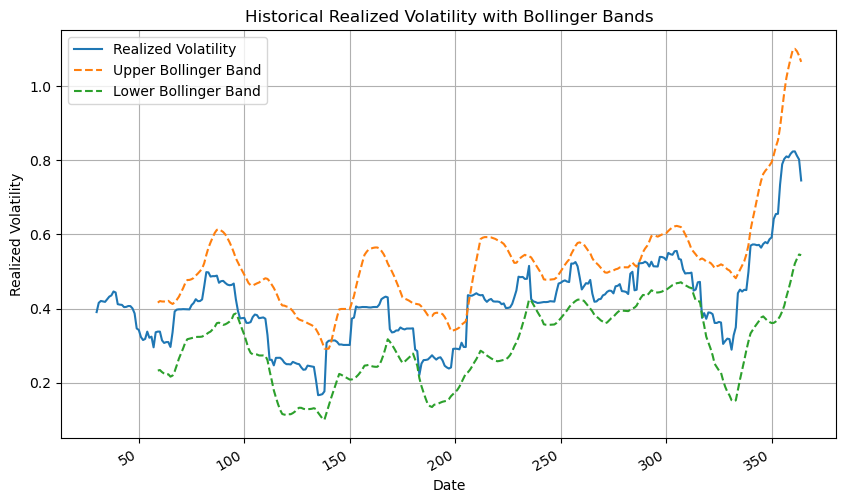

eth


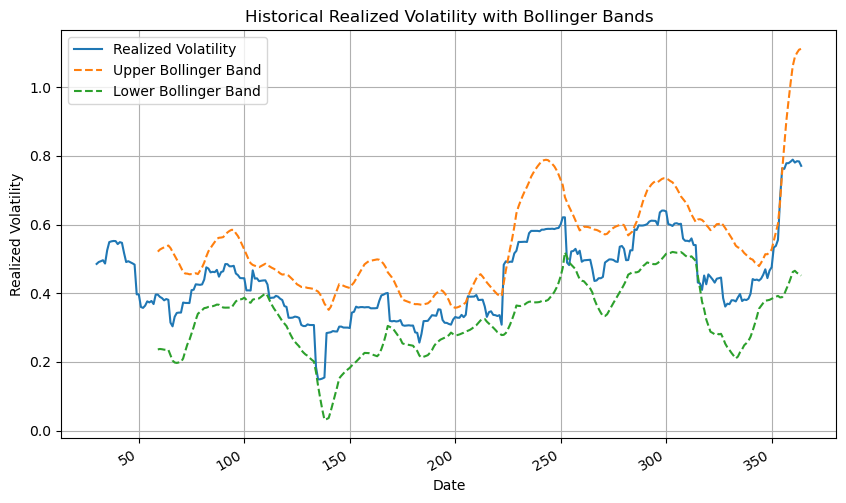

In [9]:
volatility_tickers = [ "btc", "eth"]
#volatility_tickers = [ "btc"]

asset_name_list = []
touch_up_list = []
touch_d_list = []
value_list = []

for ticker in volatility_tickers:
    print(ticker)
    asset_name_list.append(ticker)
    csv_file_path = f'data/{ticker}/{ticker}_daily.csv'
    price_history = pd.read_csv(csv_file_path)
    up_limit, d_limit, current_val = calculate_volatility_strike(price_history.tail(365), window_size=30, show = 1,write_pdf = 0, ticker = ticker)
    touch_up_list.append(up_limit)
    touch_d_list.append(d_limit)
    value_list.append(current_val)
    

In [10]:
output_df = pd.DataFrame({'Asset': asset_name_list,
                      'Up': touch_up_list,
                      'Down': touch_d_list,
                      'Current Val': value_list
                     })

print(output_df)

  Asset        Up      Down  Current Val
0   btc  1.324121  0.675879     0.745789
1   eth  1.422545  0.577455     0.771129
